In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
training_set = np.array(df["temp_max"])

In [4]:
training_set[0:10]

array([12.8, 10.6, 11.7, 12.2,  8.9,  4.4,  7.2, 10. ,  9.4,  6.1])

In [5]:
def df_to_XY(training_set,window_size=10):
    X_train=[]
    y_train=[]
    for i in range(np.shape(training_set)[0]-window_size):
        X_train.append(training_set[i:i+window_size])
        y_train.append(training_set[i+window_size])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train
WINDOW = 10
X,y = df_to_XY(training_set,WINDOW)        
    

In [6]:
print(len(X),len(y))

1451 1451


In [7]:
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [9]:
model=Sequential(
    [   Input(shape=(X_train.shape[1], 1)),
        LSTM(units=40, return_sequences = True),
        LSTM(units=40),
        Dense(units=1)
    ]
)

In [10]:
X_train.shape

(800, 10, 1)

In [11]:
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.001),
)

In [12]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 259.1873 - val_loss: 333.2390
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 149.5496 - val_loss: 220.1378
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 98.6598 - val_loss: 172.1032
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 75.7348 - val_loss: 146.4685
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 67.4162 - val_loss: 129.3338
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 64.4932 - val_loss: 115.8158
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 63.0448 - val_loss: 104.5155
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 45.9275 - val_loss: 92.9735
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 40.2024 - val_loss: 80.8834
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 30.9589 - val_loss: 71.2912
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 31.9022 - val_loss: 63.1673
Epoch 12/100
25/25 ━━

In [13]:
his = pd.DataFrame(history.history)
loss_array = np.array(his['loss'])
val_loss_array = np.array(his['val_loss'])


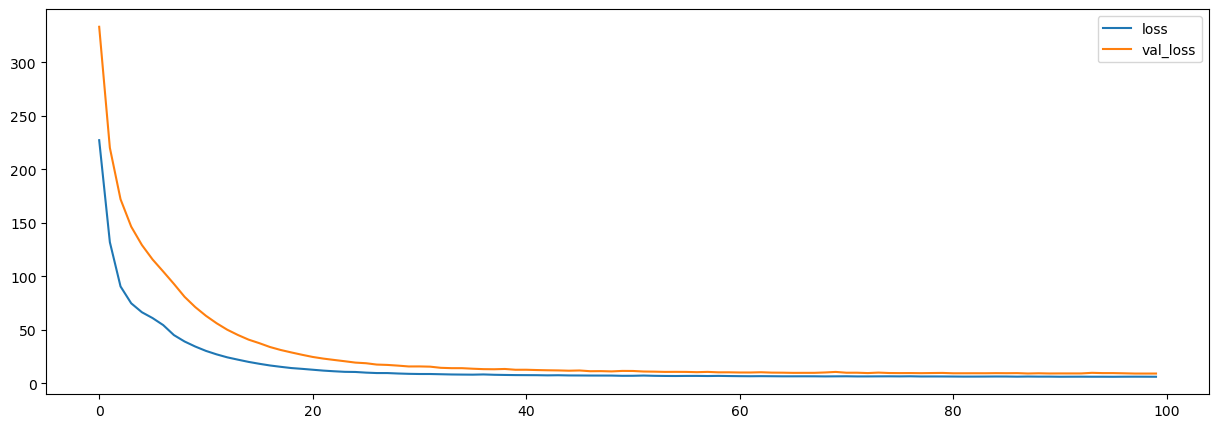

In [14]:
fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(np.arange(100),loss_array,label = 'loss')
axs.plot(np.arange(100),val_loss_array,label = 'val_loss')
axs.legend(loc=1)

In [15]:
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


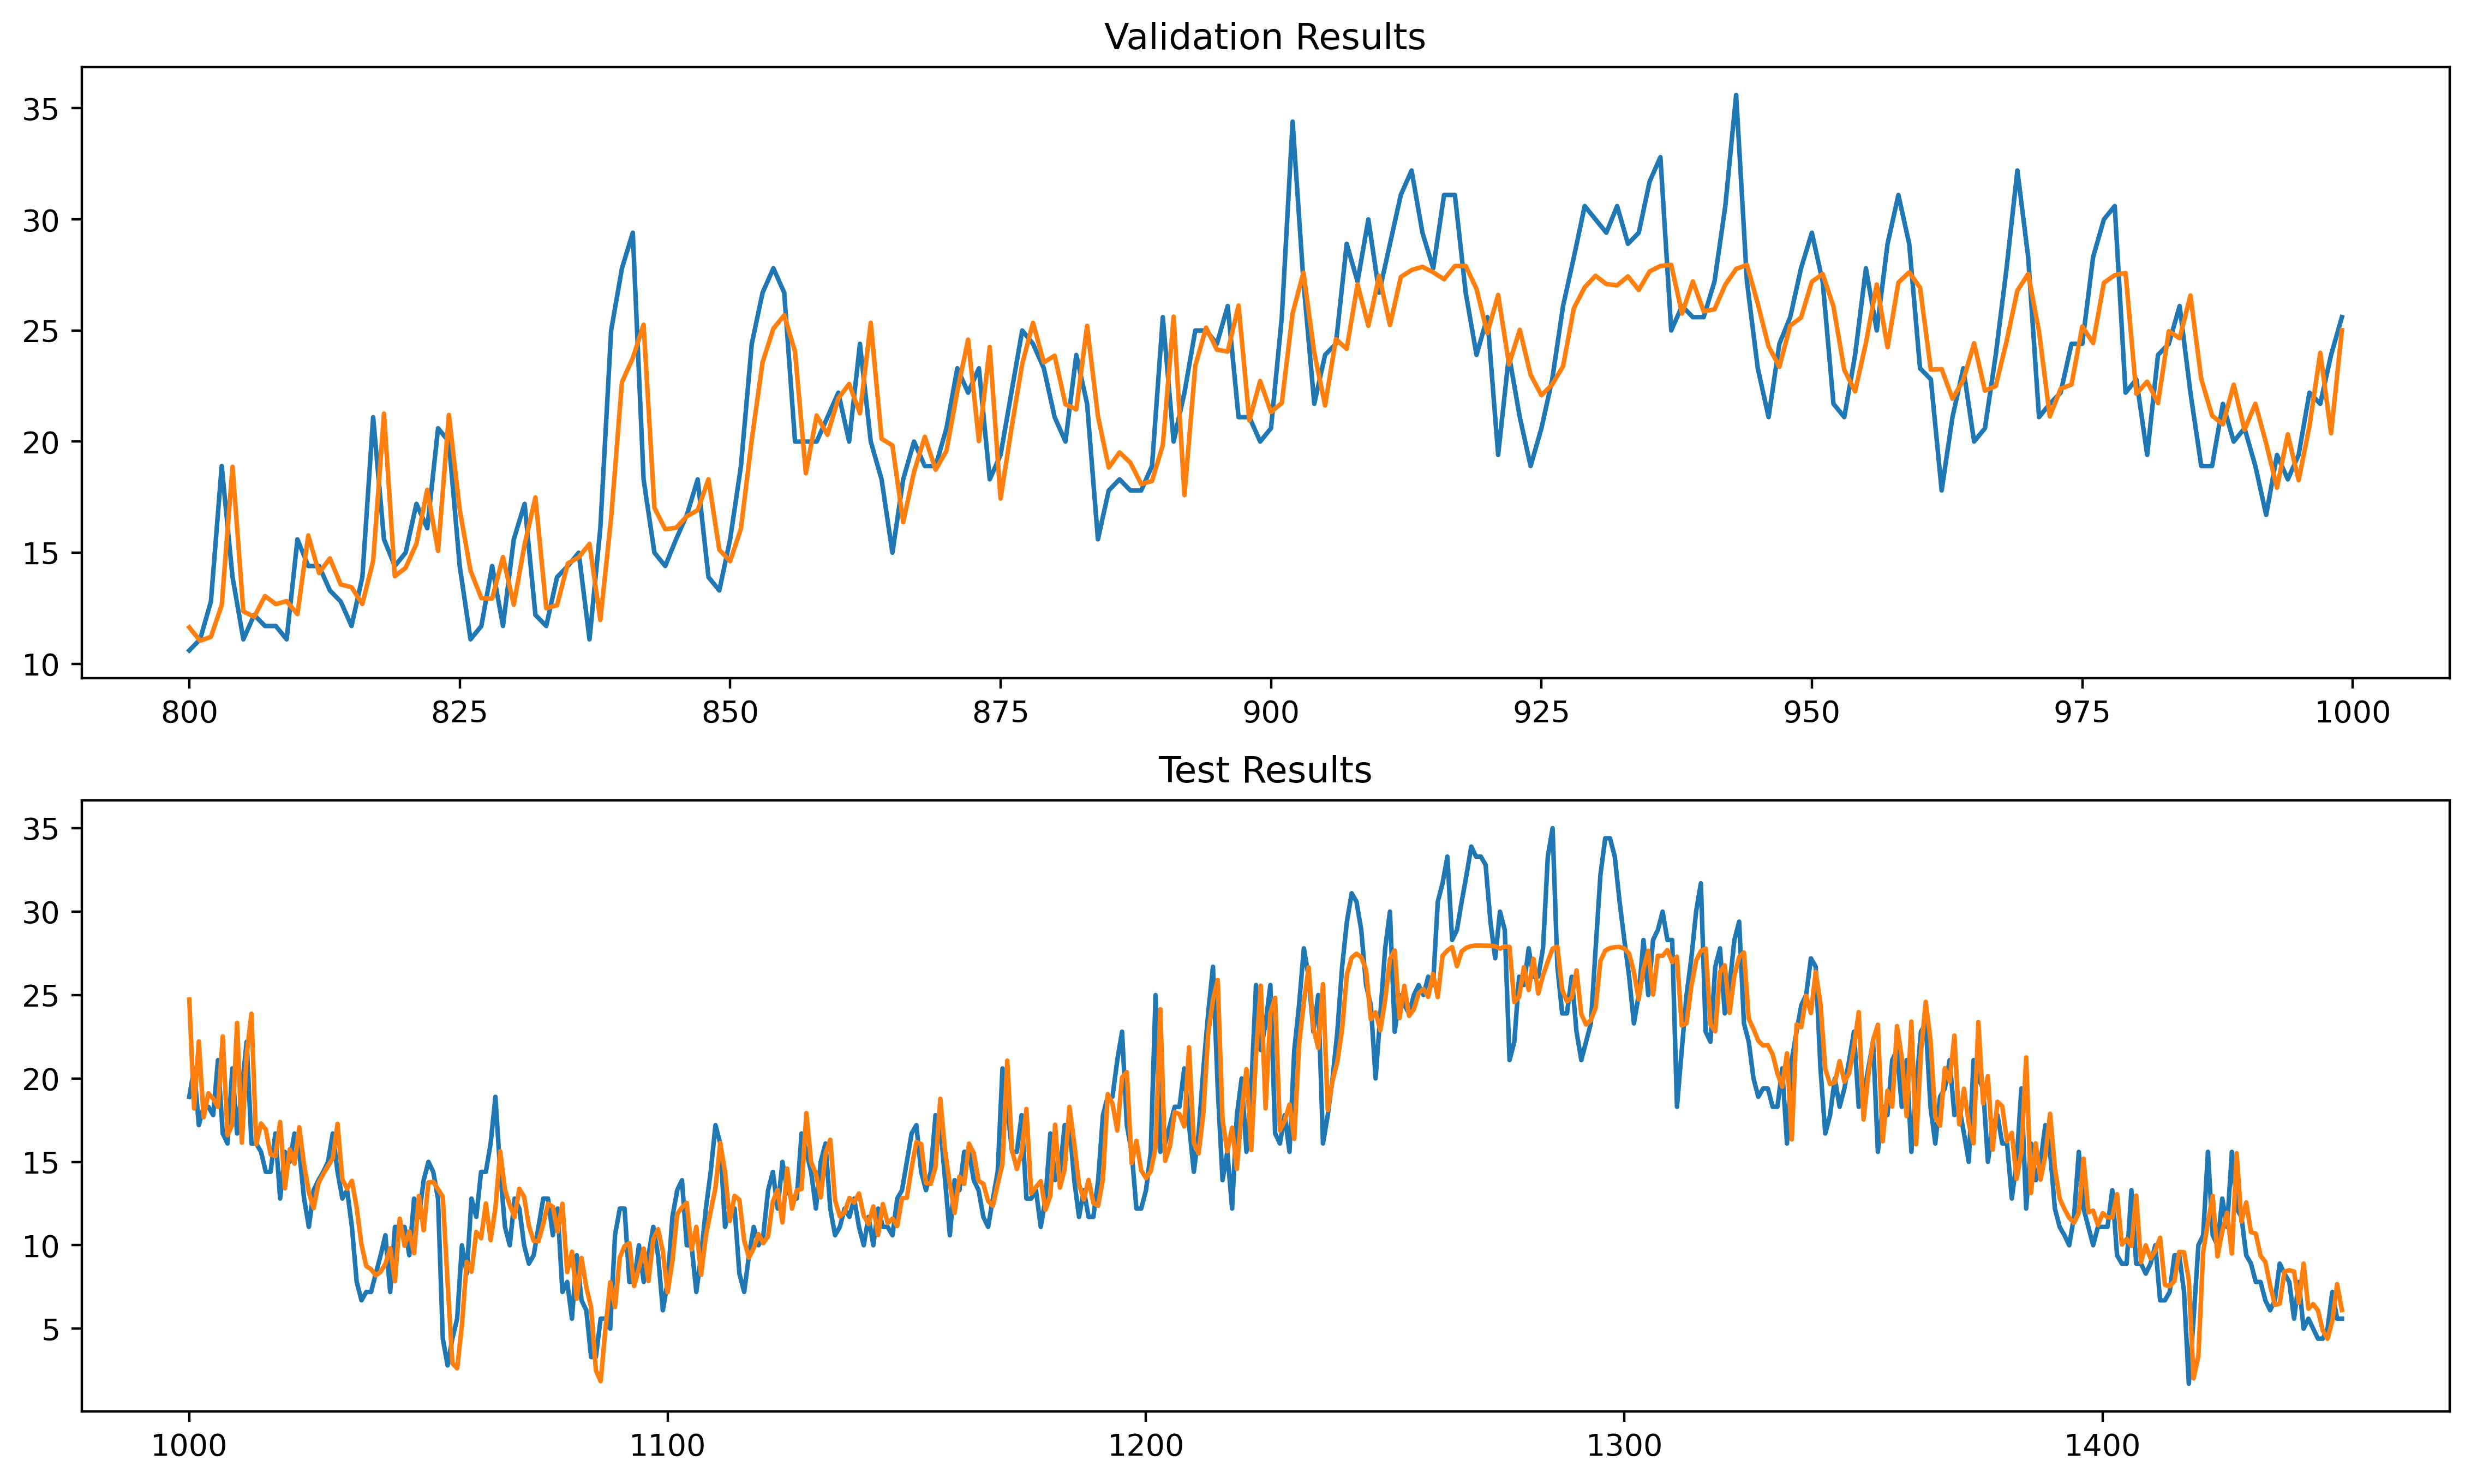

In [16]:

pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred
fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
plt.plot(np.arange(800,np.shape(df_pred[800:1000])[0]+800),df_pred[800:1000])

df_pred[1000:]
plt.subplot(2,1,2)
plt.title("Test Results")
plt.plot(np.arange(1000,np.shape(df_pred[1000:])[0]+1000),df_pred[1000:])